
# Compute and evaluate worker efficiency for individual harvest day


Starts from the trained model, performs test run followed by computation and evaluation of worker efficiency.

In [1]:
# Parameters
root_dir = "/home/uddhav/WorkerActivityRecognitionEfficiencyEstimation"
results_dir="./results/efficiency_eval"


In [2]:
#general imports
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

plt.rcParams['figure.figsize'] = [20, 10]
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [3]:
csv_results=[]
for root, dirs, files in os.walk(results_dir):
    csv_results.extend(glob.glob(os.path.join(root, '*.csv')))

combined_results_df = pd.concat([pd.read_csv(file) for file in csv_results], ignore_index=True)

combined_results_df.to_csv('results/combined_picker_efficiency.csv', index=False)

In [4]:
combined_results_df["harvest_date"].unique()

array(['5-15-24', '5-25-24', '5-4-24', '4-24-24', '5-11-24'], dtype=object)

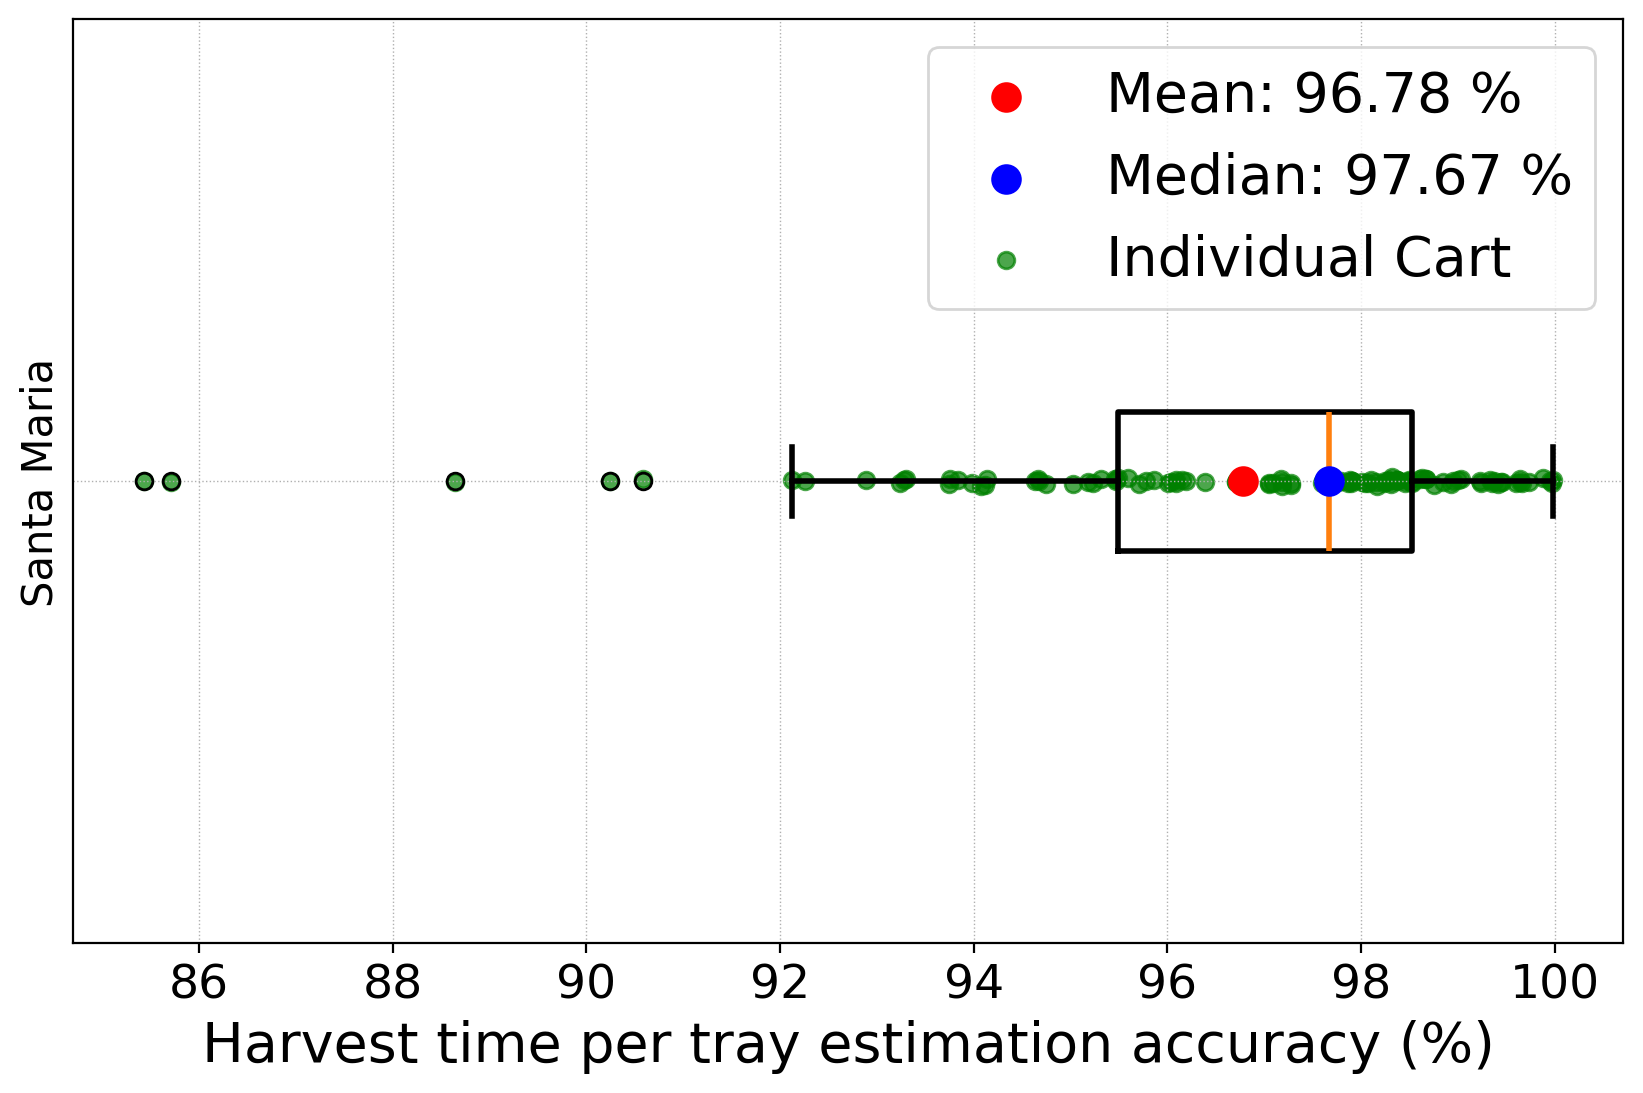

In [5]:
picking_efficiency_data=np.array(combined_results_df["time_per_tray_accuracy"].dropna())
plt.figure(figsize=(10, 6))
plt.boxplot(picking_efficiency_data, vert=False, boxprops=dict(linewidth=2),
            whiskerprops=dict(linewidth=2), capprops=dict(linewidth=2), 
            medianprops=dict(linewidth=2))
plt.xlabel('Harvest time per tray estimation accuracy (%)',fontsize=20)
plt.ylabel('Santa Maria', fontsize=15)

mean_accuracy = np.mean(picking_efficiency_data)
median_accuracy = np.median(picking_efficiency_data)

plt.scatter(mean_accuracy, 1, color='red', label=f'Mean: {mean_accuracy:0.2f} %', zorder=5, s=100)
plt.scatter(median_accuracy, 1, color='blue', label=f'Median: {median_accuracy:0.2f} %', zorder=5, s=100)

y_positions = np.random.normal(1, 0.002, size=len(picking_efficiency_data)) # Add some jitter for visibility
plt.scatter(picking_efficiency_data, y_positions, color='green', alpha=0.7, label='Individual Cart')

plt.legend(fontsize=20)

plt.grid(True, linestyle=':', linewidth=0.5)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.xticks(fontsize=17)

# plt.savefig('TimeAnalysisPickerEfficiencyBoxPlotSantaMaria2024.png',dpi=300)

plt.show()

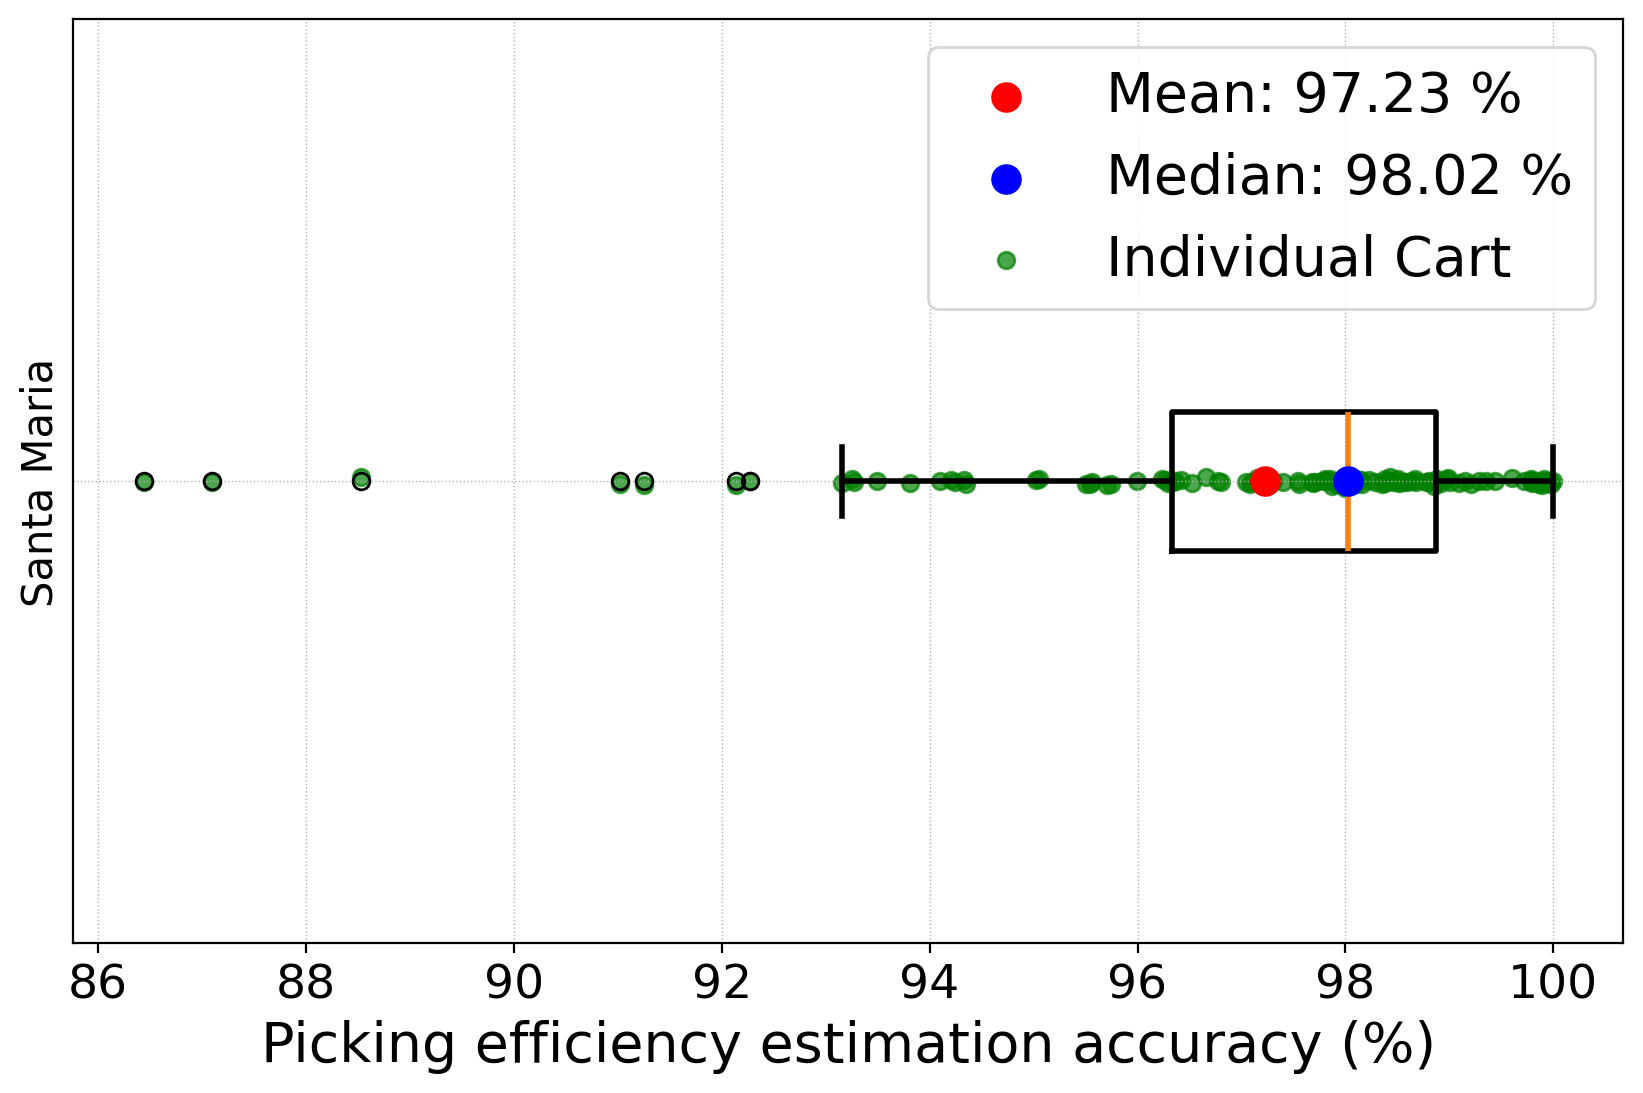

In [6]:
picking_efficiency_data=np.array(combined_results_df["efficiency_accuracy"].dropna())
plt.figure(figsize=(10, 6))
plt.boxplot(picking_efficiency_data, vert=False, boxprops=dict(linewidth=2),
            whiskerprops=dict(linewidth=2), capprops=dict(linewidth=2), 
            medianprops=dict(linewidth=2))
plt.xlabel('Picking efficiency estimation accuracy (%)',fontsize=20)
plt.ylabel('Santa Maria', fontsize=15)

mean_accuracy = np.mean(picking_efficiency_data)
median_accuracy = np.median(picking_efficiency_data)

plt.scatter(mean_accuracy, 1, color='red', label=f'Mean: {mean_accuracy:0.2f} %', zorder=5, s=100)
plt.scatter(median_accuracy, 1, color='blue', label=f'Median: {median_accuracy:0.2f} %', zorder=5, s=100)

y_positions = np.random.normal(1, 0.002, size=len(picking_efficiency_data)) # Add some jitter for visibility
plt.scatter(picking_efficiency_data, y_positions, color='green', alpha=0.7, label='Individual Cart')

plt.legend(fontsize=20)

plt.grid(True, linestyle=':', linewidth=0.5)
plt.tick_params(axis='y', which='both', left=False, labelleft=False)
plt.xticks(fontsize=17)

# plt.savefig('TimeAnalysisPickerEfficiencyBoxPlotSantaMaria2024.png',dpi=300)

plt.show()

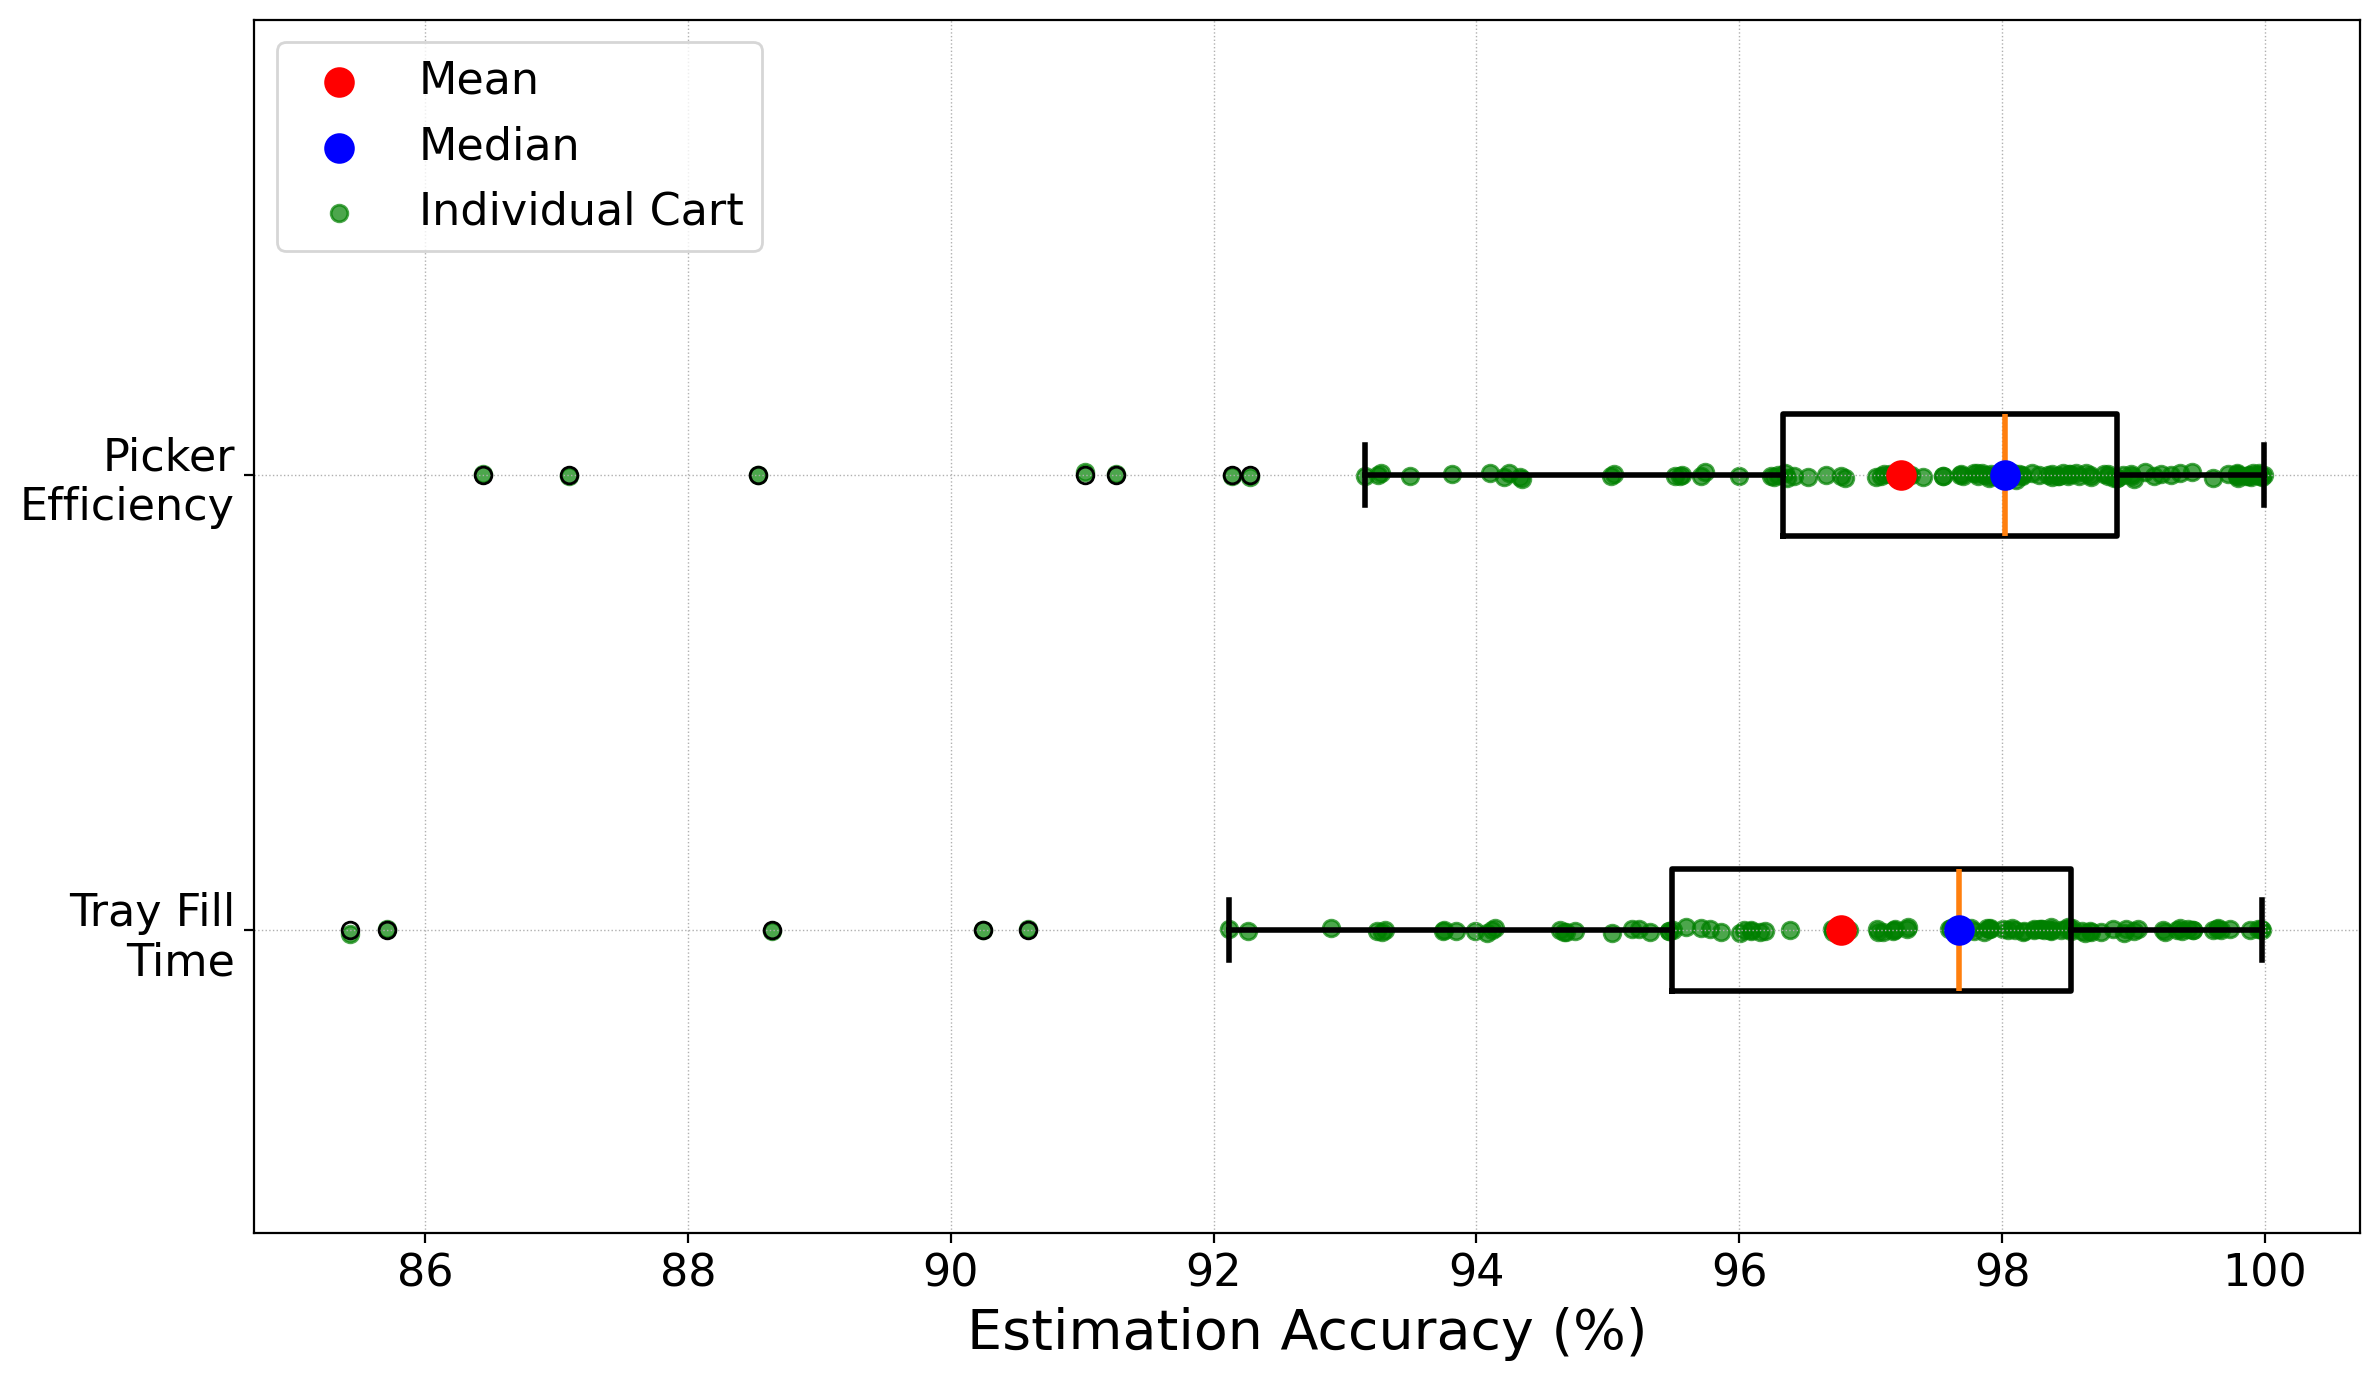

In [7]:

time_per_tray_data = np.array(combined_results_df["time_per_tray_accuracy"].dropna())
efficiency_data = np.array(combined_results_df["efficiency_accuracy"].dropna())

plt.figure(figsize=(12, 7))

bp = plt.boxplot([time_per_tray_data, efficiency_data], vert=False, 
                    positions=[0.7, 0.85],
                     widths=0.04,
                 labels=['Tray Fill\nTime', 'Picker\nEfficiency'],
                 boxprops=dict(linewidth=2),
                 whiskerprops=dict(linewidth=2),
                 capprops=dict(linewidth=2),
                 medianprops=dict(linewidth=2))

plt.xlabel('Estimation Accuracy (%)', fontsize=20)

colors = ['red', 'blue']
for i, data in enumerate([time_per_tray_data, efficiency_data]):
    mean_accuracy = np.mean(data)
    median_accuracy = np.median(data)
    
    plt.scatter(mean_accuracy, 0.7 + i*0.15, color=colors[0], 
                label=f'Mean' if i == 0 else "", zorder=5, s=100)
    plt.scatter(median_accuracy, 0.7 + i*0.15, color=colors[1], 
                label=f'Median' if i == 0 else "", zorder=5, s=100)
    
    y_positions = np.random.normal(0.7 + i*0.15, 0.0005, size=len(data))
    plt.scatter(data, y_positions, color='green', alpha=0.7, 
                label='Individual Cart' if i == 0 else "")

plt.legend(fontsize=16, loc='upper left')

plt.grid(True, linestyle=':', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.ylim(0.6, 1)

plt.tight_layout()

plt.savefig('results/CombinedEstimationAccuracyBoxPlotSantaMaria2024.png', dpi=300, bbox_inches='tight')

plt.show()


In [11]:

time_per_tray_data = np.array(combined_results_df["time_per_tray_accuracy"].dropna())
efficiency_data = np.array(combined_results_df["efficiency_accuracy"].dropna())

def get_stats(data):
    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Range": (np.min(data), np.max(data)),
        "Standard Deviation": np.std(data)
    }

time_stats = get_stats(time_per_tray_data)
efficiency_stats = get_stats(efficiency_data)

print("Picking Efficiency Accuracy:")
print(f"Mean: {efficiency_stats['Mean']:.2f}%")
print(f"Median: {efficiency_stats['Median']:.2f}%")
print(f"Range: {efficiency_stats['Range'][0]:.2f}% to {efficiency_stats['Range'][1]:.2f}%")
print(f"Standard Deviation: {efficiency_stats['Standard Deviation']:.2f}%")

print("\nHarvest Time per Tray Accuracy:")
print(f"Mean: {time_stats['Mean']:.2f}%")
print(f"Median: {time_stats['Median']:.2f}%")
print(f"Range: {time_stats['Range'][0]:.2f}% to {time_stats['Range'][1]:.2f}%")
print(f"Standard Deviation: {time_stats['Standard Deviation']:.2f}%")




Picking Efficiency Accuracy:
Mean: 97.23%
Median: 98.02%
Range: 86.44% to 99.99%
Standard Deviation: 2.63%

Harvest Time per Tray Accuracy:
Mean: 96.78%
Median: 97.67%
Range: 85.43% to 99.98%
Standard Deviation: 2.72%


In [9]:
combined_results_df

,harvest_date,cart_id,gt_pick_time,gt_no_pick_time,pred_pick_time,pred_no_pick_time,gt_efficiency,pred_efficiency,no_trays,gt_time_per_tray,pred_time_per_tray,efficiency_accuracy,time_per_tray_accuracy
0,5-15-24,1,210.485000,93.361667,223.445000,81.456667,69.273427,73.284283,67,3.141567,3.335000,94.210110,93.842792
1,5-15-24,2,218.868333,79.071667,224.818333,73.456667,73.460540,75.372838,57,3.839795,3.944181,97.396836,97.281471
2,5-15-24,6,188.228333,106.898333,193.776667,102.080000,63.778829,65.496806,46,4.091920,4.212536,97.306353,97.052339
3,5-15-24,8,220.865000,87.075000,220.796667,87.426667,71.723388,71.635286,31,7.124677,7.122473,99.877165,99.969061
4,5-15-24,10,220.923333,78.400833,223.950000,79.598333,73.807383,73.777378,44,5.020985,5.089773,99.959347,98.629992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,5-11-24,69,176.215000,82.143333,183.251667,75.830000,68.205658,70.731237,53,3.324811,3.457579,96.297112,96.006772
108,5-11-24,70,175.076667,76.561667,181.930000,73.313333,69.574720,71.277082,36,4.863241,5.053611,97.553189,96.085524
109,5-11-24,73,188.466667,61.141667,191.535000,61.138333,75.504958,75.803409,14,13.461905,13.681071,99.604726,98.371949
110,5-11-24,74,165.836667,90.565000,173.358333,83.636667,64.678467,67.455917,51,3.251699,3.399183,95.705758,95.464413
